### Comparing KNN vs Naive Bayes classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

from sklearn.datasets import load_iris

#### Data preparation

In [2]:
#Loading data
iris = load_iris(as_frame=True)

X= iris.data
y= iris.target
target_names= iris.target_names

#### KNN

PCA

In [3]:
#standarizing and splitting data
scaler= StandardScaler()
X= scaler.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

#Dimension reduction
pca= PCA(n_components=2)
X_train= pca.fit_transform(X_train)
X_test= pca.transform(X_test)

Traning and Testing with diff amount of neighbors: 3, 5, 7

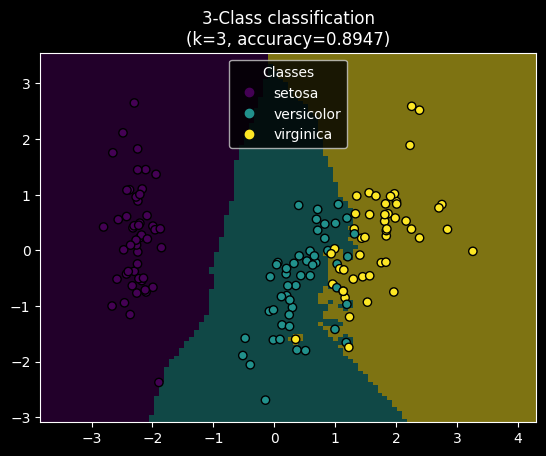

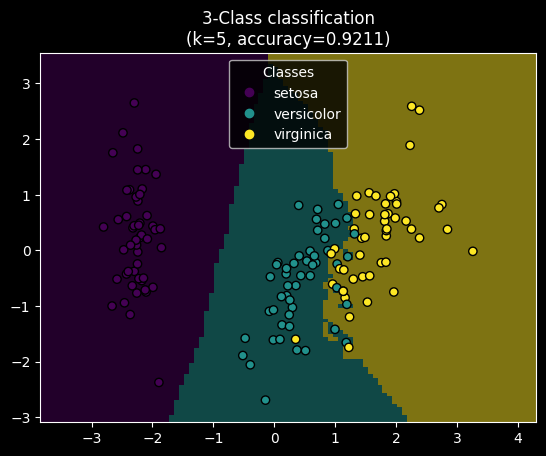

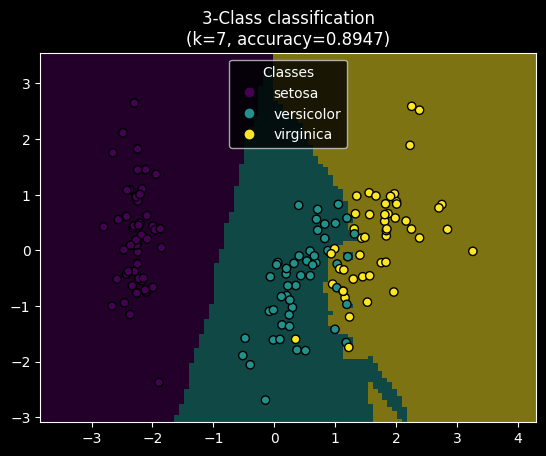

In [4]:
y_preds= np.zeros((len(y_test),3))

plt.style.use("dark_background")

j=0
for k in [3, 5, 7]:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_preds[:,j]= knn.predict(X_test)

    _, ax = plt.subplots()
    weights= "distance"

    knn.set_params(weights=weights)
    disp= DecisionBoundaryDisplay.from_estimator(
        knn,
        X_train,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )

    scatter1= disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="black")
    scatter2= disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="black")

    disp.ax_.legend(
        scatter1.legend_elements()[0],
        target_names,
        loc="upper center",
        title="Classes",
    )

    _= disp.ax_.set_title(
        f"3-Class classification\n(k={k}, accuracy={np.round(sum(y_preds[:,j]==y_test)/len(y_test),4)})"
    )
    j+=1
    plt.show()

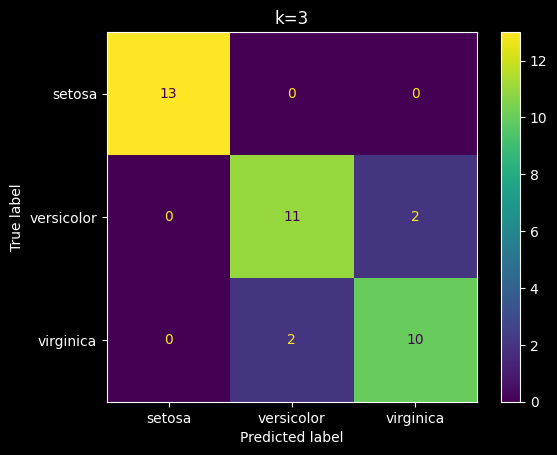

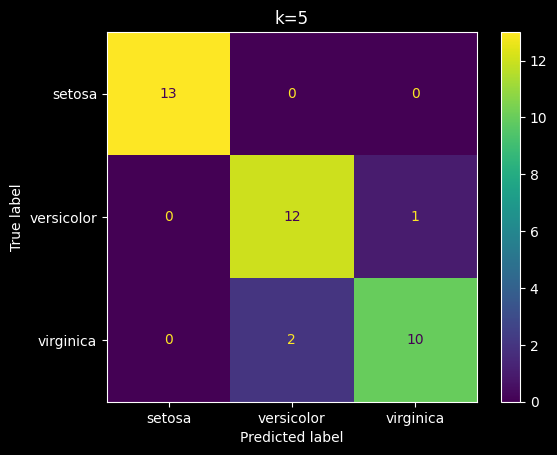

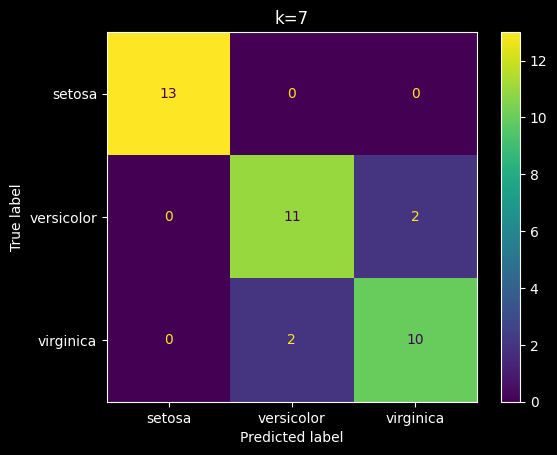

In [5]:
j=0
for k in [3, 5, 7]:
    cm= confusion_matrix(y_test, y_preds[:,j])
    disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    plt.title(f"k={k!r}")
    j+=1

#### Naive Bayes

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.76      1.00      0.87        13
   virginica       1.00      0.67      0.80        12

    accuracy                           0.89        38
   macro avg       0.92      0.89      0.89        38
weighted avg       0.92      0.89      0.89        38



Text(0.5, 1.0, 'Naive Bayes')

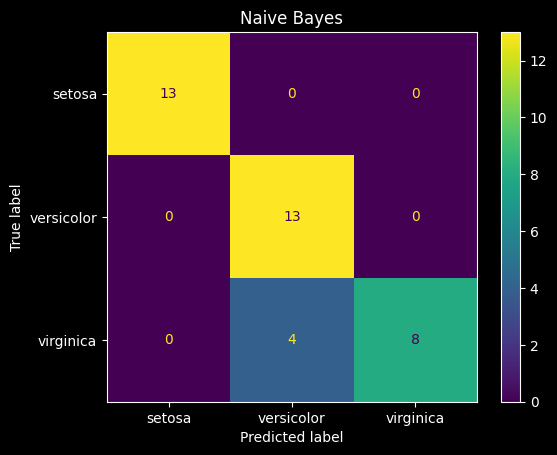

In [6]:
#Prediction
model= GaussianNB()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

#Results
print(classification_report(y_test, y_pred, target_names=target_names))
cm= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title("Naive Bayes")